In [3]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import geojson
import streamlit as st


### Creating one big Dataframe of several .csv

In [71]:
# df internet usage

df_internet_usage = pd.read_csv('data/share-of-individuals-using-the-internet.csv')
df_internet_usage.rename(columns={'Individuals using the Internet (% of population)':'internet_usage'}, inplace=True)

df_internet_usage['Year'] = df_internet_usage['Year'].astype(str)

#Create a new column that is used as id column to join data frames. Each country has several years, so combined
# the values are unique for each row and can be used as id column to merge tables

df_internet_usage['id_internet'] = df_internet_usage['Entity'] + df_internet_usage['Year'].astype(str)

# df emissions

df_emissions = pd.read_csv('data/co2_emissions_tonnes_per_person.csv')
df_emissions = pd.melt(frame=df_emissions, 
               id_vars="country", 
               value_vars=df_emissions.columns,
               var_name='Year', 
               value_name='co2_tonnes_per_person')

df_emissions['id_emissions'] = df_emissions['country'] + df_emissions['Year']


# df income

df_income = pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

df_income = pd.melt(frame=df_income, 
               id_vars="country", 
               value_vars=df_income.columns,
               var_name='Year', 
               value_name='income_per_person')


df_income['id_income'] = df_income['country'] + df_income['Year']

# df energy use

df_energy = pd.read_csv('data/energy_use_per_person.csv')

df_energy = pd.melt(frame=df_energy, 
               id_vars="country", 
               value_vars=df_energy.columns,
               var_name='Year', 
               value_name='energy_per_person')


df_energy['id_energy'] = df_energy['country'] + df_energy['Year']


# Join all the df

df_full = df_internet_usage.merge(df_emissions, left_on='id_internet', right_on='id_emissions',suffixes=['_internet', '_emissions'])
df_full = df_full.merge(df_income, left_on='id_internet', right_on='id_income',suffixes=['_full', '_income'])
df_full = df_full.merge(df_energy, left_on='id_internet', right_on='id_energy',suffixes=['_full', '_energy'])


df_full = df_full[['Entity','Year_internet','Code','internet_usage','co2_tonnes_per_person','income_per_person','energy_per_person']]


len(df_full.Entity.unique())
df_full.tail()

# Save the csv
#df_full.to_csv('data/gapminder.csv')

,Entity,Year_internet,Code,internet_usage,co2_tonnes_per_person,income_per_person,energy_per_person
3993,Zambia,2012,ZMB,13.468200,0.241,3340,630
3994,Zambia,2013,ZMB,15.400000,0.252,3400,645
3995,Zambia,2014,ZMB,19.000000,0.277,3450,NaN
3996,Zambia,2015,ZMB,21.000000,0.271,3440,NaN
3997,Zimbabwe,1990,ZWE,0.000000,1.49,4170,891
3998,Zimbabwe,1991,ZWE,0.000000,1.49,4300,923
3999,Zimbabwe,1992,ZWE,0.000000,1.55,3830,934
4000,Zimbabwe,1993,ZWE,0.000000,1.47,3800,878
4001,Zimbabwe,1994,ZWE,0.001739,1.57,4090,858
4002,Zimbabwe,1995,ZWE,0.007684,1.32,4040,862


### Experimenting with graphs


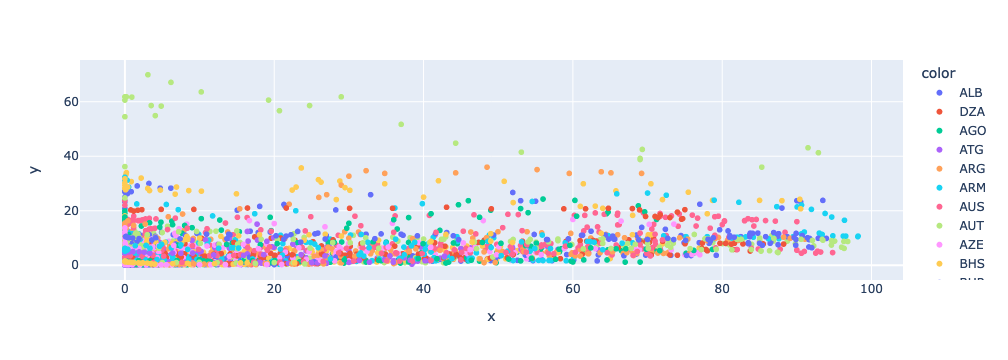

In [56]:
fig = px.scatter(x=df_full['internet_usage'], 
                 y=df_full['co2_tonnes_per_person'],
                color = df_full['Code'],
                )
fig.show()

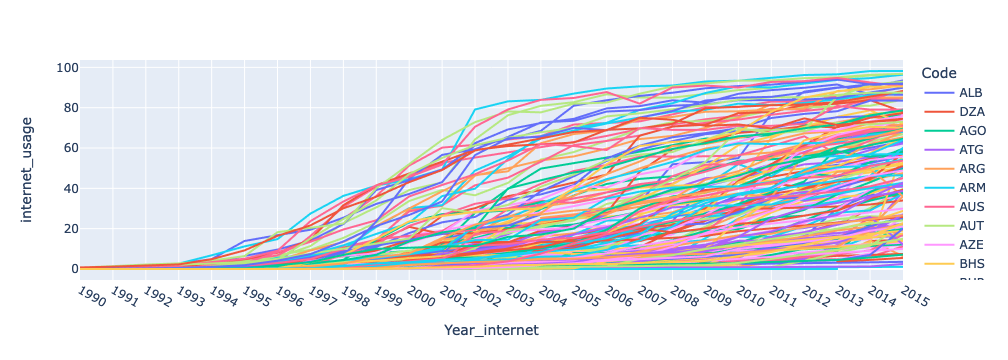

In [62]:
fig = px.line(df_full, x="Year_internet", y="internet_usage", color = 'Code')
fig.show()

In [65]:
left_column, middle_column, right_column = st.columns([3,1,1])

country = pd.unique(df_full['Entity'])
#cntr = left_column.selectbox("Choose a country", country)
cntr = left_column.multiselect("Choose a country",country,default=['Lebanon','United States','Kuwait','Germany'],max_selections = 5)

def add_trace_f(num = 1):
    fig.add_trace(go.Scatter(x=df_full[df_full['Entity']==cntr[num]]['Year_internet'], 
                             y=df_full[df_full['Entity']==cntr[num]]['internet_usage'],
                            mode='lines',
                            name=cntr[num]))
    

    

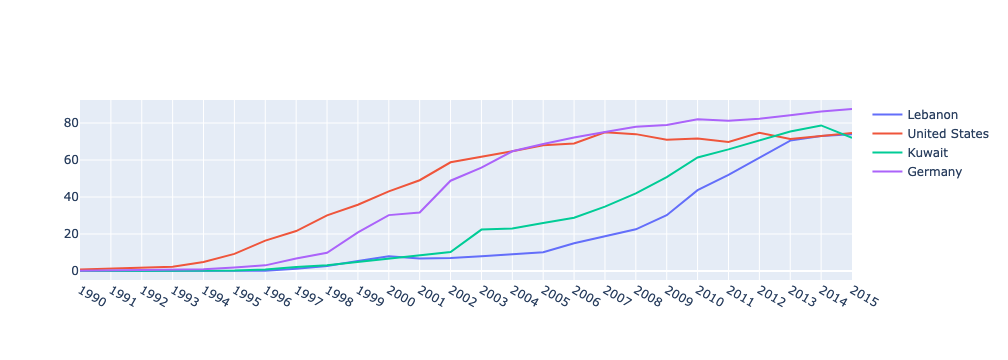

In [66]:
fig = go.Figure()

if len(cntr) == 5:
    for i in range(len(cntr)):
        add_trace_f(num = i)
    fig.show()

if len(cntr) == 4:
    for i in range(len(cntr)):
        add_trace_f(num = i)
    fig.show()

if len(cntr) == 3:
    for i in range(len(cntr)):
        add_trace_f(num = i)
    fig.show()

if len(cntr) == 2:
    for i in range(len(cntr)):
        add_trace_f(num = i)
    fig.show()

if len(cntr) == 1:
    for i in range(len(cntr)):
        add_trace_f(num = i)
    fig.show()
        



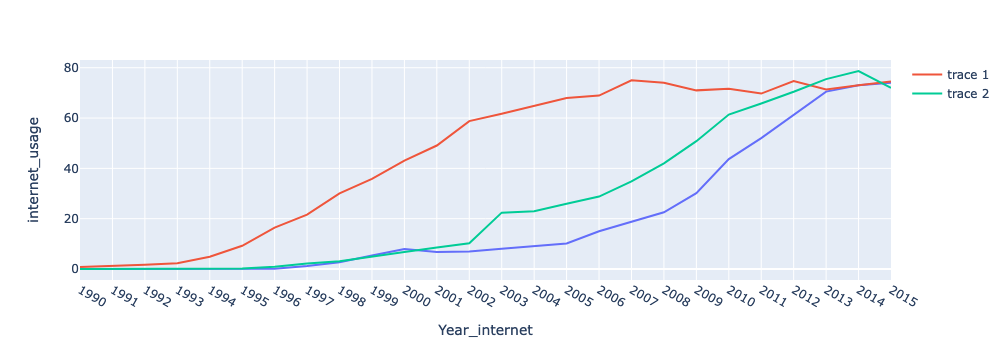

In [69]:
fig2 = px.line(df_full[df_full['Entity']==cntr[0]], x="Year_internet", y="internet_usage")
fig2.add_scatter(x = df_full[df_full['Entity']==cntr[1]]['Year_internet'], y=df_full[df_full['Entity']==cntr[1]]['internet_usage'],mode='lines')
#fig2.add_scatter(x = df[df['Entity']==cntr[2]]['Year'], y=df[df['Entity']==cntr[2]]['internet_usage'],mode='lines')
fig2.add_scatter(x = df_full[df_full['Entity']==cntr[3]]['Year_internet'], y=df_full[df_full['Entity']==cntr[2]]['internet_usage'],mode='lines')
#fig2.add_scatter(x = df_full[df_full['Entity']==cntr[4]]['Year_internet'], y=df_full[df_full['Entity']==cntr[2]]['internet_usage'],mode='lines')

fig2.show()

In [1]:
# Experiment using Plotly graph objects instead of Plotly express

In [4]:
internet_df = pd.read_csv('data/share-of-individuals-using-the-internet.csv')
internet_df.rename(columns={'Individuals using the Internet (% of population)':'internet_usage'}, inplace=True)

gapminder_df = pd.read_csv('data/gapminder.csv')

In [9]:
internet_df.head()
#type(internet_df.Year[1])

,Entity,Code,Year,internet_usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [ ]:
#Map created with Plotly express

'''
fig = px.choropleth(internet_df[internet_df['Year'] == year], 
                    geojson=countries, locations='Code',
                    color='internet_usage',
                    color_continuous_scale="thermal",
                    scope='world',
                    featureidkey="properties.ISO_A3",
                    labels={'internet_usage':'Internet usage in %'},

                    width=1200,
                    height=600
                          )

fig.update_layout(
    title = {'text':'Individuals using the internet per country in percent',
             'y': 0.9,
             'x': 0.5,
             'xanchor': 'center',
             'yanchor': 'top'
             },
    font={
        'family': "verdana, monospace",
        'size': 12}
                  )


fig.show()'''